# Distribución de probabilidad

Son funciones que toman como variable de entrada el evento aleatorio y que le asignan una probabilidad de éxito dentro del espacio muestreal, siendo conocidas a su vez por densidad de probabilidad. 

> $P(X=x) \to P=f(x)$

Las distribuciones tienen dominios que pueden ser discretos o continuos, dependiendo de la población de todos los posibles eventos. 

Se puede calcular no solo la probabilidad de un evento, sino la probabilidad de un conjunto de valores:

> $P(X \le x) = \int\limits_{-\inf}^{x}{P(X)dX} = C(X) \gets$ Función de probabilidad aculumada continua
>
> $P(X \le x) = \sum\limits_{X\le x}{P(X)} = C(X) \gets$ Función de probabilidad aculumada discreta



## Distribución de Bernoulli o binomial

Tambien llamada distribución binomial, es decir dos posibles resultados en cada evento. 

Para el caso del lanzamiento de una moneda se pueden definir las siguientes probabilidades:

> $P(X=1) = p$
>
> $P(X=0) = 1 - p$

Si se lanzan $n$ veces una moneda, y se quiere saber cual es la probabilidad de obtener $k$ caras:

> $P(k;n,p) = \dbinom{n}{k}p^{k}(1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$


In [25]:
import numpy as np
import pandas as pd
from numpy.random import binomial, normal
from scipy.stats import binom, norm
from math import factorial
import matplotlib.pyplot as plt 

In [3]:
def my_binomial(k, n, p):
    probability = (factorial(n) / factorial(k)*factorial(n-k)) * pow(p, k) * pow(1-p, n-k)
    return probability

In [4]:
# Using the function made previously
my_binomial(2, 3, 0.5)

0.375

In [5]:
# Using the function applied in scipy
dist = binom(3, 0.5)
dist.pmf(2)

0.375

Calculemos la probabilidad de que :
> ## $P(k\le 2, n = 3, p = 12) = \sum\limits_{k=0}^{2}{\frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}}$

In [6]:
dist.cdf(2)

0.875

### Simulaciones se sequencias con generadores aleatorios


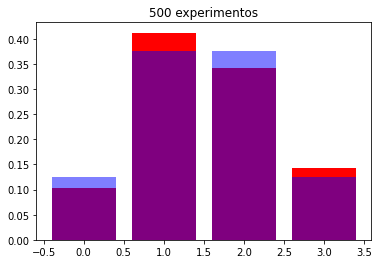

In [7]:
def simulate_trials(trials):
    p = 0.5
    n = 3
    values = [i for i in range(4)]
    results = []
    for _ in range(trials):
        results.append(binomial(n, p))
    simulated_dist = np.unique(results, return_counts=True)[1]/len(results)
    theorical_dist = [binom(3, 0.5).pmf(k) for k in values]
    plt.bar(values, simulated_dist, color='red')
    plt.bar(values, theorical_dist, alpha=0.5, color='blue')
    plt.title(f'{trials} experimentos')
    plt.show()

if __name__ == '__main__':
    simulate_trials(500)

## Distribuciones Normal

### Distribución normal teórica

> ## $P(X) = \frac{1}{\sigma\sqrt(2\pi)}exp\left[-\frac{1}{2} \left(\frac{X-\mu}{\sigma}\right)^{2} \right]$

* $\mu$ : Media de la distribución
* $\sigma$ : Desviación estandar de la distribución 

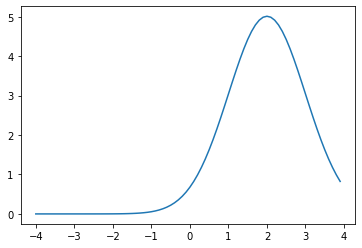

In [8]:
def gaussian(x, mu, sigma):
    probability = (1 / sigma*np.sqrt(2*np.pi)) * (np.exp(-0.5 * pow((x-mu/sigma), 2)))
    return probability

x = np.arange(-4, 4, 0.1)
y = gaussian(x, 1, 0.5) 

plt.plot(x, y)

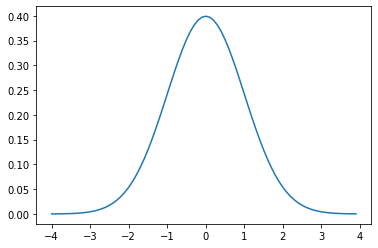

In [9]:
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

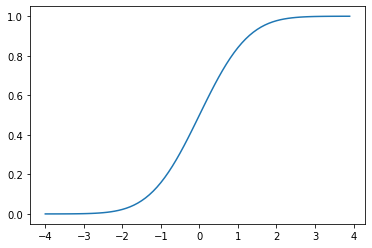

In [10]:
dist = norm(0, 1) 
x = np.arange(-4, 4, 0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x, y)

### Distribución normal (Gausiana) a partir de datos

<BarContainer object of 19 artists>

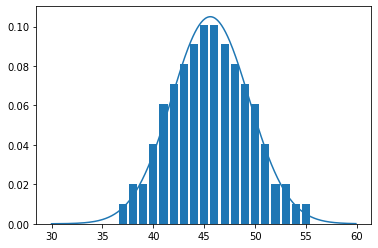

In [24]:
df = pd.read_excel('Data/housefly-wing-lengths.xls')
df_values = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(df_values, return_counts=True)

mu = df_values.mean()
sigma = df_values.std()
x = np.arange(30, 60, 0.1)
distr = norm(mu, sigma)
y = [distr.pdf(value) for value in x]

plt.plot(x, y)
plt.bar(values, dist/len(df_values))

## Estimación paramétrica

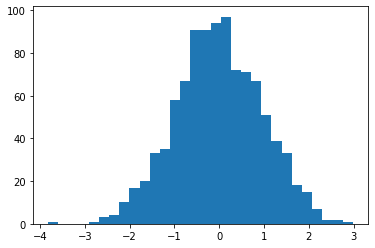

In [29]:
sample = normal(size = 1000)
plt.hist(sample, bins = 30)
plt.show()

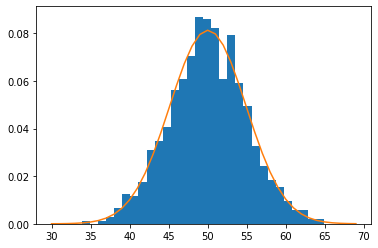

In [32]:
sample = normal(loc=50, scale=5, size=1000)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

## Estimación no paramétrica 
**Kernel Density Estimation**

* Smoothing parameter
* Basis function

In [45]:
from numpy import hstack
import numpy as np
from sklearn.neighbors import KernelDensity

#Let's Build a bimodal distribution
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample3 = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample3.reshape((len(sample3), 1))
model.fit(sample)
model.kernel

'gaussian'

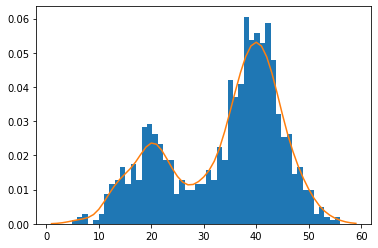

In [46]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()